# 10-2 Boston 주택 가격 예측 모델

## 데이터 로드
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

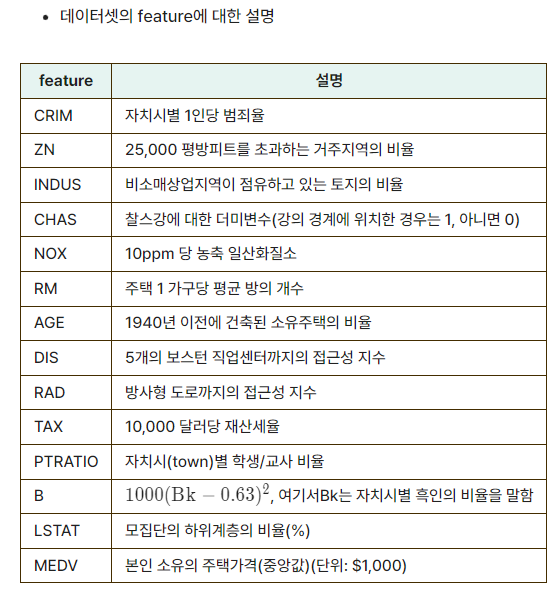

In [69]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn import model_selection
from sklearn import metrics

In [70]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [71]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(404, 13) (404,)
(102, 13) (102,)


## 데이터 전처리
- 값의 범위가 다르면 제대로 학습시키기 어려움
- 표준화(Standardization)

z = $x - \bar{x} \over \sigma $ = $X - Mean(X) \over StdDev(X) $

In [72]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]

mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]

std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std


In [73]:
#검증 데이터셋을 만듭니다
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size = 0.3,
                                                  random_state = 123)

print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(test_data.shape, test_labels.shape))

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)
테스트 데이터: (102, 13) 레이블: (102,)


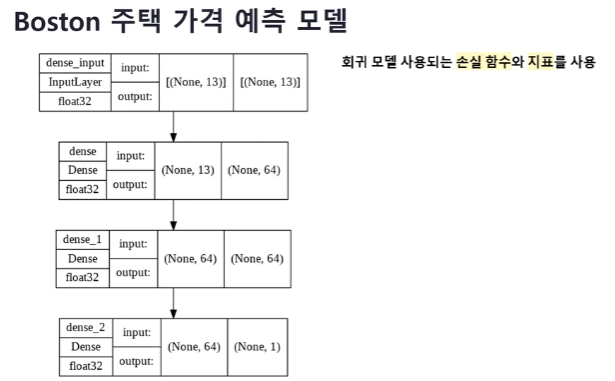
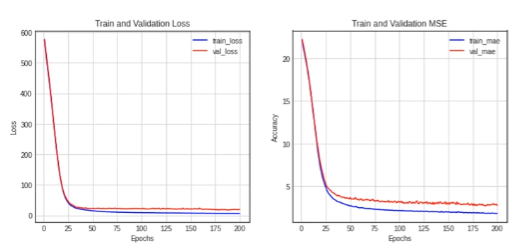

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. 
- Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [94]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

model = models.Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
model.add(layers.Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(layers.Dense(1)) # 하나의 값을 출력합니다.

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


### 모델 학습
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [75]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(x_train, y_train,
                    epochs = 60,
                    batch_size=512,
                    validation_data = (x_val, y_val))
print(model.evaluate(test_data, test_labels))  

Epoch 1/60
1/1 [==============================] - 0s 375ms/step - loss: 567.1046 - mae: 22.0219 - val_loss: 606.7314 - val_mae: 22.8997
Epoch 2/60
1/1 [==============================] - 0s 20ms/step - loss: 564.0169 - mae: 21.9517 - val_loss: 603.4024 - val_mae: 22.8295
Epoch 3/60
1/1 [==============================] - 0s 18ms/step - loss: 560.9304 - mae: 21.8814 - val_loss: 600.0528 - val_mae: 22.7590
Epoch 4/60
1/1 [==============================] - 0s 17ms/step - loss: 557.8087 - mae: 21.8102 - val_loss: 596.6987 - val_mae: 22.6879
Epoch 5/60
1/1 [==============================] - 0s 17ms/step - loss: 554.6712 - mae: 21.7386 - val_loss: 593.3073 - val_mae: 22.6160
Epoch 6/60
1/1 [==============================] - 0s 18ms/step - loss: 551.5084 - mae: 21.6661 - val_loss: 589.8924 - val_mae: 22.5434
Epoch 7/60
1/1 [==============================] - 0s 18ms/step - loss: 548.3209 - mae: 21.5929 - val_loss: 586.4417 - val_mae: 22.4698
Epoch 8/60
1/1 [==============================] - 0s 1

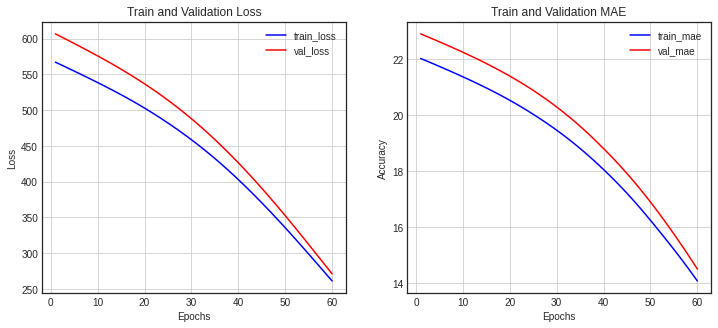

In [76]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [77]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 276.0487 - mae: 14.6648


[276.0487060546875, 14.664835929870605]

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

#----------------------------------------
# K-Fold를 진행해봅니다.
k = 3

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 훈련 데이터셋(404개)를 3등분하여
# 1개는 검증셋으로, 나머지 2개는 훈련셋으로 활용합니다.
kfold = KFold(n_splits=k, random_state = 777)

# 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13, )))
    model.add(Dense(32, activation = 'relu')) 
    model.add(Dense(1))   

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.
# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델을 불러옵니다.
    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))

    _, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)

# 10-3 Reuters 딥러닝 모델
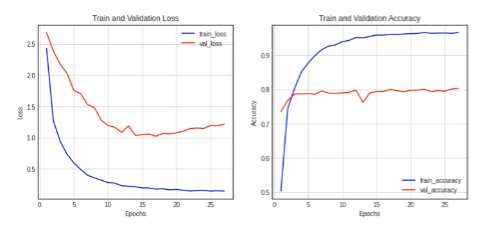

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [84]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.25,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (2246,) 레이블: (2246,)


In [88]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
      # [[YOUR CODE]]
    results = np.zeros((len(data), dim))
    for i, label in enumerate(data):
        results[i, label] = 1.
    return results


# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [91]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = keras.Sequential([

    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(input_shape=(28, 28, 1),
                        filters=32,
                        kernel_size=4,
                        padding="same",
                        activation=tf.nn.relu),

    keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),

    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(filters=64,
                        kernel_size=[4, 4],
                        padding="same",
                        activation=tf.nn.relu),

    keras.layers.MaxPooling2D(pool_size=[2, 2], strides=2),

    # 배치 정규화와 드롭아웃을 적용합니다.(드롭아웃 rate = 0.4)
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128,
                       activation=keras.activations.relu,
                       kernel_initializer='he_uniform',
                       bias_initializer='he_uniform'),
    keras.layers.Dense(10, activation=keras.activations.softmax)

])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)        

In [96]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

In [98]:
model = models.Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1], )))
model.add(layers.Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(layers.Dense(1)) # 하나의 값을 출력합니다.

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [99]:
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])    

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

KeyError: 'accuracy'

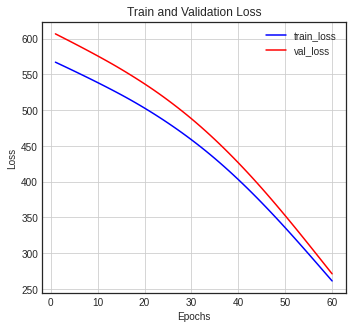

In [100]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [102]:
model.evaluate(x_test, y_test)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

# 10-4.  CIFAR10 딥러닝 모델

In [103]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [107]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [108]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

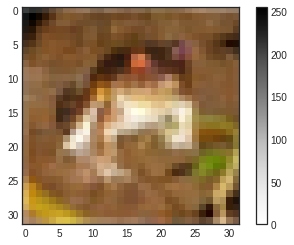

In [109]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [110]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(2246,)
(10000, 32, 32, 3)


TypeError: only integer scalar arrays can be converted to a scalar index

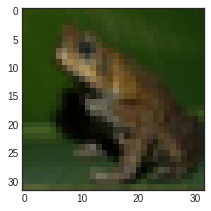

In [114]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train[idx, :]
    label = y_train[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title('Index: {}, Label: {}'.format(idx, class_names[label]))
    
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [112]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

TypeError: unsupported operand type(s) for /: 'list' and 'float'